In [1]:
import json 
with open("intents.json", 'r') as f:
    data = json.load(f)

In [2]:
type(data)

list

In [3]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [4]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [5]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [6]:
import pandas as pd

df = pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [7]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [8]:
df['patterns'] = df['patterns'].apply(", ".join)
df['responses'] = df['responses'].apply(", ".join)
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","Hello, thanks for contacting us, Good to see y..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","See you later, thanks for visiting, have a gre..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","Happy to help!, Any time!, My pleasure, It is ..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","We're open every day 8am-7pm, Our office hours..."
4,payments,"Can I pay using credit card?, Can I pay using...","We accept VISA, Mastercard and credit card, We..."


### Cleaning data

In [9]:
from nltk.corpus import stopwords
from textblob import Word
import string
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

In [10]:
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x)))                                      
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x for x in word_tokenize(x) if x not in string.punctuation))
df['patterns'] = df['patterns'].str.replace('[^\W\S]','')
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x for x in word_tokenize(x) if not x in stop))
df['patterns'] = df['patterns'].apply(lambda x: " ".join(Word(word).lemmatize(pos='v') for word in word_tokenize(x)))
df

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_9536\1055189548.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['patterns'] = df['patterns'].str.replace('[^\W\S]','')


,tag,patterns,responses
0,welcome,hi one talk hello hi available,"Hello, thanks for contacting us, Good to see y..."
1,goodbye,bye see later goodbye come back soon,"See you later, thanks for visiting, have a gre..."
2,thankful,thank help thank guidance 's helpful kind,"Happy to help!, Any time!, My pleasure, It is ..."
3,hoursopening,hours open tell open time open time please,"We're open every day 8am-7pm, Our office hours..."
4,payments,pay use credit card pay use mastercard pay use...,"We accept VISA, Mastercard and credit card, We..."


In [11]:
# taking the outer list (list of all words in pattern column)
bugger_list = []
for i in df['patterns']:
    li = i.split()
    bugger_list.append(li)

bugger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [12]:
from gensim.models import Word2Vec

## Custom data is fed to machine for further processing 
model = Word2Vec(bugger_list, min_count = 1, vector_size=2)

In [13]:
model.wv

In [14]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [15]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [16]:
model.wv['hours']

array([-0.38314208,  0.48097077], dtype=float32)

In [17]:
model.wv.key_to_index.keys()

dict_keys(['pay', 'open', 'use', 'hi', 'time', 'thank', 'hello', 'talk', 'soon', 'one', 'bye', 'see', 'later', 'goodbye', 'come', 'back', 'available', 'cash', 'help', 'mastercard', "'s", 'helpful', 'kind', 'hours', 'tell', 'please', 'credit', 'card', 'guidance'])

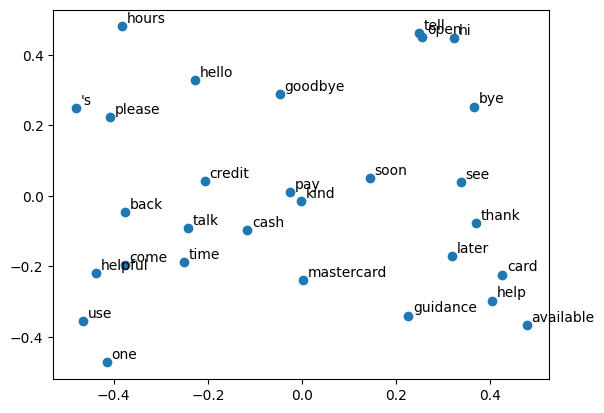

In [55]:
import matplotlib.pyplot as plt

vector = [list(model.wv[i]) for i in list(model.wv.key_to_index.keys())]
index = [i for i in model.wv.key_to_index.keys()]
df1 = pd.DataFrame(vector, index = index,columns = ['x','y'])

fig, ax = plt.subplots()
ax.scatter(df1['x'], df1['y'])

for i, txt in enumerate(df1.index):
    ax.annotate(txt, (df1.iloc[i,0]+0.01, df1.iloc[i,1]+0.01))

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(model.wv['tell'].reshape(1,-1),model.wv['open'].reshape(1,-1))

array([[0.9997937]], dtype=float32)

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(model.wv['tell'].reshape(1,-1),model.wv['one'].reshape(1,-1))

array([[-0.9747792]], dtype=float32)

In [61]:
model.wv.most_similar('help', topn=5)

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135)]

In [62]:
dissimilar_words = model.wv.doesnt_match("see you later, thanks for visiting".split())
dissimilar_words

'see'